In [96]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [97]:
leak_potential = -70*pow(10,-3)
leak_potential

-0.07

In [98]:
membrane_resistance = 5*pow(10,6)
membrane_resistance 

5000000

In [99]:
membrane_capacitance = 2*(pow(10,-12))
membrane_capacitance

2e-12

In [100]:
time_constant = membrane_resistance*membrane_capacitance
time_constant

9.999999999999999e-06

In [101]:
spike_threshold = -50*pow(10, -3)
spike_threshold

-0.05

In [102]:
reset_potential = -65*pow(10, -3)
reset_potential

-0.065

In [103]:
time_vector = np.arange(0, .2, 0.01)
time_vector 

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [104]:
membrane_potential_vector = np.full((20),leak_potential)

In [105]:
membrane_potential_vector

array([-0.07, -0.07, -0.07, -0.07, -0.07, -0.07, -0.07, -0.07, -0.07,
       -0.07, -0.07, -0.07, -0.07, -0.07, -0.07, -0.07, -0.07, -0.07,
       -0.07, -0.07])

In [106]:
#Ith = (Vth - El)*GL or (Vth - El)/RL
threshold_current = (spike_threshold - leak_potential)/(membrane_resistance)

In [107]:
threshold_current

4.000000000000001e-09

In [108]:
#applied_current_vector = np.full((20), Io)
applied_current_vector = np.zeros(20)
for i in range(20):
    if(i<10 or i > 15):
        applied_current_vector[i] = 0
    else:
        applied_current_vector[i] = 6*pow(10,-9)
        
#for i in range(20):
    #print(applied_current_vector[i])

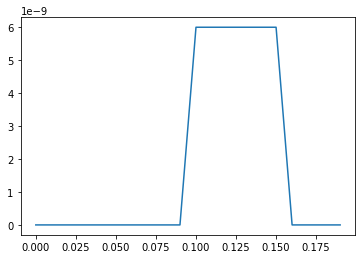

In [109]:
plt.plot(time_vector, applied_current_vector)
plt.show()
#plt.xlim(0, 1)
#plt.ylim(-pow(10, -15), pow(10, -15))

In [110]:
#noise_vec = randn(size(t))*sigma_I*sqrt(dt)
sigma_I = 100*np.random.rand(20)
noise_vector = np.random.rand(20)
for i in range(20):
    noise_vector[i] = noise_vector[i]*sigma_I[i]*math.sqrt(time_vector[i])
noise_vector

array([ 0.        ,  4.03678987,  2.37269326,  3.27002361,  5.46976783,
        0.76525538,  5.29951479,  5.12986001,  0.64123021, 25.40308698,
        0.30721984,  0.84002367,  9.55628096,  1.02991074,  4.12903106,
        0.75619574,  5.61285141,  0.99736596,  3.61912075,  7.58147884])

In [111]:
vm = membrane_potential_vector[0]
i = 0
dt = 0.1

for i in range(time_vector.size -2):
    #tp = time_vector[i]
    dVmdt =  (leak_potential - membrane_potential_vector[i])/membrane_resistance*membrane_capacitance + applied_current_vector[i]/membrane_capacitance
    #print("change in potential at" , time_vector[i+1] , "is" , dVmdt)
    membrane_potential_vector[i+1] = membrane_potential_vector[i] + dt*dVmdt + noise_vector[i]
    #print("the membrane potential at", time_vector[i+1] , "is" , membrane_potential_vector[i+1])
    #V(i) = V(i-1) + dt*(I(i) +G_L*(E_L-V(i-1)))/Cm;
    if(membrane_potential_vector[i+1] > spike_threshold):
        #print("potential reset")
        membrane_potential_vector[i+2] = reset_potential

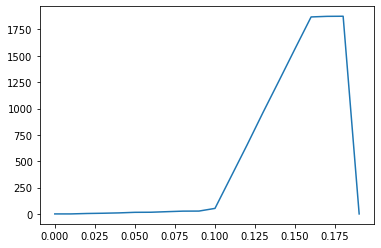

In [112]:
plt.plot(time_vector, membrane_potential_vector)
plt.show()

In [113]:
#applied_current_vector = np.full((20), Io)
i = 1
applied_current_vector = np.zeros(20)
for i in range(20):
        applied_current_vector[i] = applied_current_vector[i-1] + 2*pow(10,-9)

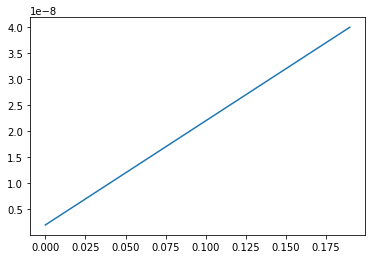

In [114]:
plt.plot(time_vector, applied_current_vector)
plt.show()

In [115]:
firing_rate = np.zeros(20)
for i in range(20):
    if((applied_current_vector[i]*membrane_resistance + leak_potential - reset_potential) > 0 and (applied_current_vector[i]*membrane_resistance + leak_potential - spike_threshold)>0):
        firing_rate[i] = 1/(time_constant*math.log(applied_current_vector[i]*membrane_resistance + leak_potential - reset_potential) - time_constant*math.log(applied_current_vector[i]*membrane_resistance + leak_potential - spike_threshold))

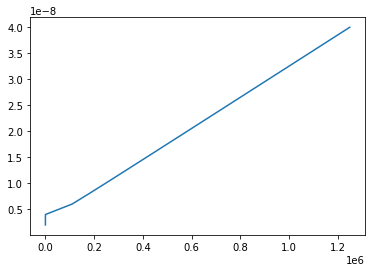

In [116]:
plt.plot(firing_rate, applied_current_vector)
plt.show()

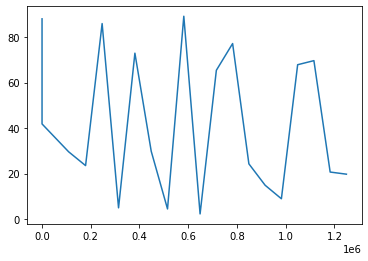

In [117]:
plt.plot(firing_rate, sigma_I)
plt.show()